In [2]:
import os.path as osp
import sys
from pathlib import Path
import matplotlib.pyplot as plt

sys.path.append(str(Path(osp.abspath("")).parent))

%config InlineBackend.figure_format='retina'

In [3]:
import numpy as np

from curve import BSpline

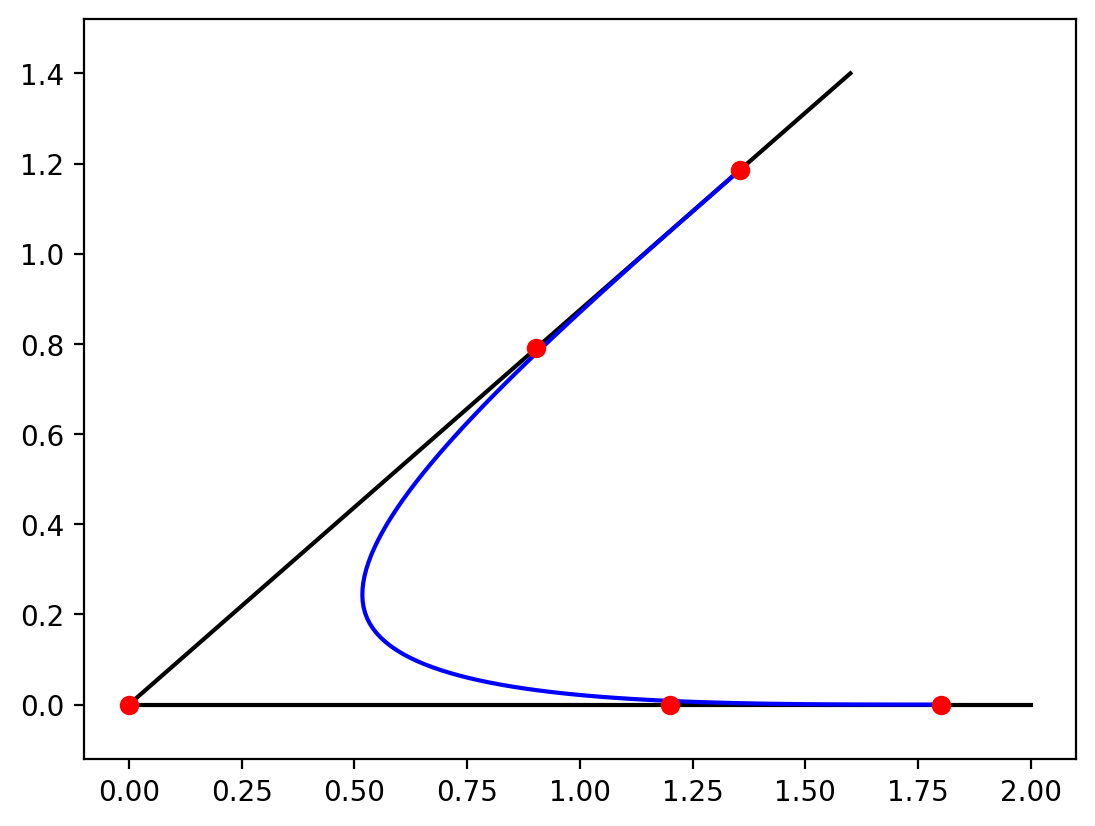

In [79]:
def normalize(v):
    return v / np.linalg.norm(v)


P0 = np.array([1.6, 1.4])
P1 = np.array([0, 0])
P2 = np.array([2, 0])

c = 0.5
d2 = 1.2
d1 = c * d2

dir1 = normalize(P0 - P1)
dir2 = normalize(P2 - P1)
Q00 = P1 + (1 + c) * d2 * dir1
Q01 = P1 + d2 * dir1
Q02 = P1
Q03 = P1 + d2 * dir2
Q04 = P1 + (1 + c) * d2 * dir2

degree = 3

ctr_pts0 = np.array([Q00, Q01, Q02, Q03, Q04])
knots0 = [0, 0, 0, 0, 0.5, 1, 1, 1, 1]
B0 = BSpline(ctr_pts0, degree, knots0)

pts = B0(np.linspace(0, 1, 100))
# plot P0P1
plt.plot([P0[0], P1[0]], [P0[1], P1[1]], "k")
plt.plot([P1[0], P2[0]], [P1[1], P2[1]], "k")
# plot bspline
plt.plot(pts[:, 0], pts[:, 1], "b")
plt.plot(ctr_pts0[:, 0], ctr_pts0[:, 1], "ro")
plt.axis("equal")
plt.show()

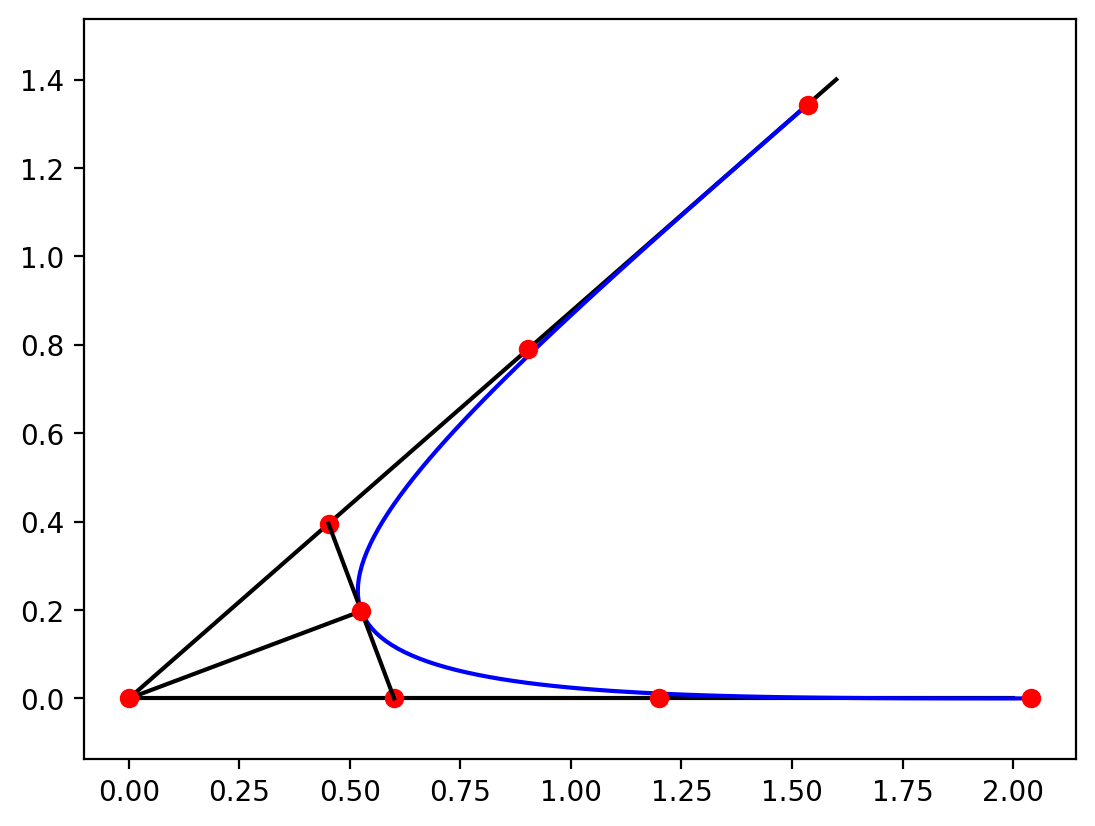

In [114]:
Q10 = Q00
Q11 = Q01
Q12 = (Q01 + Q02) / 2
Q13 = (Q02 + Q03) / 2
Q14 = Q03
Q15 = Q04

ctr_pts1 = np.array([Q10, Q11, Q12, Q13, Q14, Q15])
knots1 = [0, 0, 0, 0, 0.5, 0.5, 1, 1, 1, 1]
B1 = BSpline(ctr_pts1, degree, knots1)

pts1 = B1(np.linspace(0, 1, 100))

plt.plot([P0[0], P1[0]], [P0[1], P1[1]], "k")
plt.plot([P1[0], P2[0]], [P1[1], P2[1]], "k")

plt.plot(pts1[:, 0], pts1[:, 1], "b")
plt.plot(ctr_pts1[:, 0], ctr_pts1[:, 1], "ro")
plt.plot([Q12[0], Q13[0]], [Q12[1], Q13[1]], "k")
C = B1(0.5)
plt.plot([P1[0], C[0]], [P1[1], C[1]], "k")
plt.plot([P1[0], C[0]], [P1[1], C[1]], "ro")

plt.axis("equal")
plt.show()

$\varepsilon$

In [108]:
C, P1

(array([0.52577301, 0.19755138]), array([0, 0]))

In [85]:
np.linalg.norm(pts1 - pts)

1.2362920382602608e-15

In [86]:
B0(0.5), B1(0.5)

(array([0.52577301, 0.19755138]), array([0.52577301, 0.19755138]))

$B_0(u)$和$B_1(u)$其实都是同一条曲线

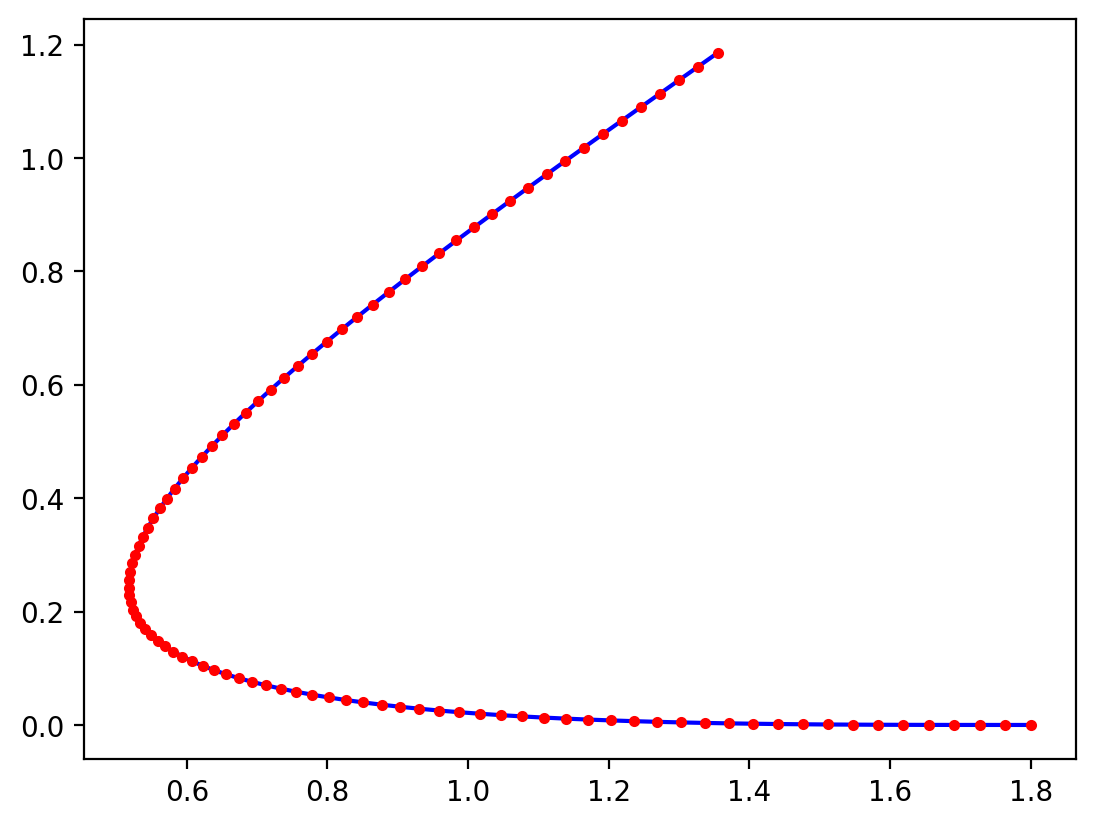

In [87]:
plt.plot(pts[:, 0], pts[:, 1], "b")
plt.plot(pts1[:, 0], pts1[:, 1], ".r")
plt.show()

不同的 c 不会影响 B(u)的过渡形状

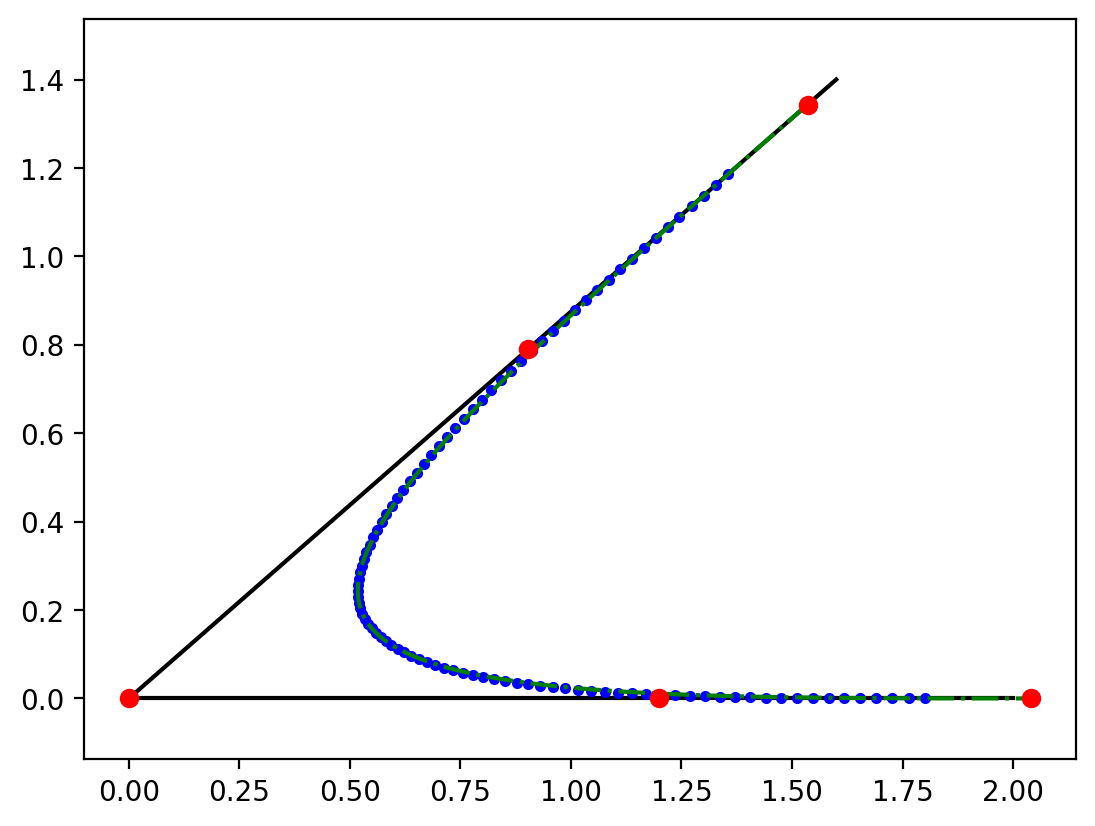

In [90]:
c = 0.7
d2 = 1.2
d1 = c * d2

dir1 = normalize(P0 - P1)
dir2 = normalize(P2 - P1)
Q00 = P1 + (1 + c) * d2 * dir1
Q01 = P1 + d2 * dir1
Q02 = P1
Q03 = P1 + d2 * dir2
Q04 = P1 + (1 + c) * d2 * dir2

degree = 3

ctr_pts0 = np.array([Q00, Q01, Q02, Q03, Q04])
knots0 = [0, 0, 0, 0, 0.5, 1, 1, 1, 1]
B10 = BSpline(ctr_pts0, degree, knots0)

pts10 = B10(np.linspace(0, 1, 100))
# plot P0P1
plt.plot([P0[0], P1[0]], [P0[1], P1[1]], "k")
plt.plot([P1[0], P2[0]], [P1[1], P2[1]], "k")
# plot bspline
plt.plot(pts[:, 0], pts[:, 1], ".b")
plt.plot(pts10[:, 0], pts10[:, 1], "-.g")
plt.plot(ctr_pts0[:, 0], ctr_pts0[:, 1], "ro")
plt.axis("equal")
plt.show()

In [91]:
B10(0.5), B0(0.5)

(array([0.52577301, 0.19755138]), array([0.52577301, 0.19755138]))

In [92]:
B10.curvature(0.5), B0.curvature(0.5)

(8.407568226324143, 8.407568226324143)